In [48]:
# see https://github.com/huggingface/pytorch-transformers

# and how to use hidden layers as sentence/word embedding:

# https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/

import torch
from pytorch_transformers import *
import os
import re
import numpy as np
import matplotlib.pylab as plt


In [24]:
# import data
filename = "data/all_sentences_with_Kohle_withoutnl.txt"

# read sentences from file
file = open(filename, "r")
lines = file.readlines()
file.close()
matched_sentences_withoutnl = [line.replace("\n", "") for line in lines]
matched_sentences_withoutnl

['Eigentlich hätte er doch die Steinkohle erwähnen müssen, nicht wahr.',
 'Herr Kollege Fischer, ich wollte mich nur vergewissern, ob ich Sie wirklich richtig verstanden habe: Haben Sie eben zum Ausdruck bringen wollen, daß die der Steinkohle zugesagten Subventionen, daß die Subventionen für die Werften, daß die Subventionen für die deutsche Landwirtschaft allesamt Subventionen für Großverdiener sind?',
 'Die Klientel, die Sie beschützen wollen, hängt in der Tat nicht von Steinkohlesubventionen ab, hängt nicht von Landwirtschaftssubventionen ab -- wobei die Dinge hier schon etwas anders aussehen -- und hängt nicht von Werftensubventionen ab, sondern die hängt davon ab, daß sie nominell hohe Spitzensteuersätze in diesem Lande umgehen kann.',
 'Ich weiß doch, daß Sie die Kohle brauchen, wenn Sie die Kernkraftwerke abschalten wollen.',
 'Jetzt habe ich als Ministerpräsident von Baden-Württemberg wirklich jahrelang darum gekämpft, daß der Kohlepfennig abgeschafft wird.',
 'Herr Teufel, wen

In [3]:
# Let's encode some text in a sequence of hidden-states using the BERT model
pretrained_model = 'bert-base-german-cased' # 'bert-base-uncased'

save_dir_tokenizer = './data/pretrained_sentence_embeddings/tokenizer/' + pretrained_model + '/'
save_dir_model = './data/pretrained_sentence_embeddings/model/' + pretrained_model + '/'

if os.path.isdir(save_dir_model):
    model = BertModel.from_pretrained(save_dir_model)
else:
    os.makedirs(save_dir_model)
    model = BertModel.from_pretrained(pretrained_model)
    model.save_pretrained(save_dir_model)
    
if os.path.isdir(save_dir_tokenizer):
    tokenizer = BertTokenizer.from_pretrained(save_dir_tokenizer)
else:
    os.makedirs(save_dir_tokenizer)
    tokenizer = BertTokenizer.from_pretrained(pretrained_model)
    tokenizer.save_pretrained(save_dir_tokenizer)

In [26]:
# Encode single sentence

text = matched_sentences_withoutnl[1]

input_ids = torch.tensor([tokenizer.encode(text, add_special_tokens=True)])  # Add special tokens takes care of adding [CLS], [SEP], <s>... tokens in the right way for each model.

with torch.no_grad():
    model_output = model(input_ids)  # Models outputs are now tuples

In [20]:
tokenized_text = tokenizer.tokenize('[CLS]' + text + '[SEP]')
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
for i, tup in enumerate(zip(tokenized_text, indexed_tokens)):
      print (i, tup)

0 ('[CLS]', 3)
1 ('Herr', 1964)
2 ('Kollege', 19394)
3 ('Fischer', 6248)
4 (',', 2036)
5 ('ich', 1169)
6 ('wollte', 2664)
7 ('mich', 3277)
8 ('nur', 356)
9 ('verg', 5159)
10 ('##ew', 23207)
11 ('##isser', 11005)
12 ('##n', 26898)
13 (',', 2036)
14 ('ob', 834)
15 ('ich', 1169)
16 ('Sie', 371)
17 ('wirklich', 4899)
18 ('richtig', 5367)
19 ('verstanden', 8876)
20 ('habe', 555)
21 (':', 5982)
22 ('Haben', 18630)
23 ('Sie', 371)
24 ('eben', 914)
25 ('zum', 260)
26 ('Ausdruck', 5566)
27 ('bringen', 4169)
28 ('wollen', 2376)
29 (',', 2036)
30 ('daß', 2751)
31 ('die', 30)
32 ('der', 21)
33 ('Stein', 2513)
34 ('##kohle', 16197)
35 ('zugesagt', 26737)
36 ('##en', 7)
37 ('Sub', 4477)
38 ('##ventionen', 19333)
39 (',', 2036)
40 ('daß', 2751)
41 ('die', 30)
42 ('Sub', 4477)
43 ('##ventionen', 19333)
44 ('für', 142)
45 ('die', 30)
46 ('Werft', 17471)
47 ('##en', 7)
48 (',', 2036)
49 ('daß', 2751)
50 ('die', 30)
51 ('Sub', 4477)
52 ('##ventionen', 19333)
53 ('für', 142)
54 ('die', 30)
55 ('deutsche',

In [21]:
last_hidden_states = model_output[0]
print(last_hidden_states.shape)
last_hidden_states

# batch, # tokens, # features

torch.Size([1, 68, 768])


tensor([[[-0.2357,  0.8505,  0.6483,  ...,  0.1541, -1.3710,  0.2817],
         [-0.3948,  0.3916, -1.1977,  ...,  0.3843, -0.6867,  1.0293],
         [ 0.2916, -0.5230,  0.8078,  ..., -0.1827, -0.4700, -0.3659],
         ...,
         [-0.2831, -1.2285, -0.4495,  ..., -0.5483, -1.0450, -0.3140],
         [-0.2243, -0.0275, -0.3960,  ...,  0.1602, -1.2407, -0.4125],
         [ 0.2105,  0.3822,  0.9050,  ...,  0.5630, -0.9303, -0.5277]]])

In [23]:
# select token Kohle
kohle_id = 34
last_hidden_states[0][kohle_id]

tensor([ 3.3327e-01, -2.6528e-02,  1.2821e-01,  1.3214e-01,  4.8285e-01,
         6.6324e-02,  3.1898e-01, -4.5068e-01, -1.3336e-01,  8.7383e-01,
        -1.0610e+00, -3.0866e-01,  5.3058e-01,  2.9246e-01, -2.0049e-01,
         4.1154e-01,  7.8437e-01, -5.8452e-01,  1.5234e-01, -1.1975e+00,
        -6.5776e-01,  5.3977e-01,  2.9312e-01, -7.3302e-01,  4.9610e-02,
        -6.6600e-01,  3.0711e-01, -4.8461e-01,  3.1547e-01, -1.7732e-01,
        -4.2294e-02,  1.8296e-01,  1.4222e-01,  4.3980e-01,  2.9090e-02,
         3.4519e-01,  4.7477e-01, -5.4587e-01, -8.8579e-02, -3.4765e-02,
         7.2400e-02, -5.7835e-01, -2.4034e-01, -2.9202e-01,  1.1602e+00,
         9.7631e-02, -2.4164e-01,  7.2018e-01,  6.8308e-01, -6.2424e-01,
         5.3099e-01,  2.4747e-01,  6.5576e-01,  1.9648e-02,  7.1187e-01,
        -9.7571e-02, -2.6833e-01, -5.5433e-01, -7.0203e-01, -1.5317e-01,
        -1.9534e-02, -5.1965e-01,  3.9594e-01, -9.7577e-01,  6.4024e-01,
        -1.3769e-01, -7.4825e-02,  9.2567e-02, -8.3

In [59]:
# encode large number of sentences
output = []

SEARCH = re.compile("kohle", re.IGNORECASE)

for i, text in enumerate(matched_sentences_withoutnl[:10]):
    input_ids = torch.tensor([tokenizer.encode(text, add_special_tokens=True)]) # Add special tokens takes care of adding [CLS], [SEP], <s>... tokens in the right way for each model.

    with torch.no_grad():
        last_hidden_states = model(input_ids)[0]
    
    tokenized_text = tokenizer.tokenize('[CLS]' + text + '[SEP]')
    for j, token in enumerate(tokenized_text):
        if SEARCH.search(token):
            print(i, j, token)
            output.append(last_hidden_states[0][j])


0 7 ##kohle
1 34 ##kohle
2 19 ##kohle
3 8 Kohle
4 19 Kohle
5 9 Kohle
6 11 Kohle
7 20 Kohle
8 50 Kohle
9 7 Kohle


In [60]:
array = np.array([tensor.numpy() for tensor in output])
array

array([[-0.39798963, -0.020375  ,  0.6959345 , ...,  0.32136166,
        -1.0342972 , -0.4809233 ],
       [ 0.33326602, -0.02652761,  0.12821335, ...,  0.61787003,
        -0.77577364, -0.2871433 ],
       [ 0.07941765,  0.39210528,  0.1769825 , ..., -0.22324991,
        -0.43100598, -0.24866238],
       ...,
       [ 0.56306195,  0.01814016, -0.02427896, ...,  0.03321787,
        -0.3692655 ,  0.15492328],
       [ 0.6242243 , -0.02852457,  0.2657995 , ..., -0.3975365 ,
        -0.3733474 ,  0.24714904],
       [-0.42168203,  0.45944256,  1.0086205 , ...,  0.00782962,
        -1.4902383 , -1.0225132 ]], dtype=float32)

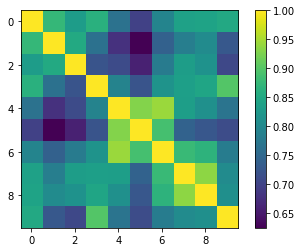

In [61]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(array)

plt.imshow(cos_sim)
plt.colorbar()

In [52]:
for i, sentence in enumerate(matched_sentences_withoutnl[:10]):
    print(i, sentence)

0 Eigentlich hätte er doch die Steinkohle erwähnen müssen, nicht wahr.
1 Herr Kollege Fischer, ich wollte mich nur vergewissern, ob ich Sie wirklich richtig verstanden habe: Haben Sie eben zum Ausdruck bringen wollen, daß die der Steinkohle zugesagten Subventionen, daß die Subventionen für die Werften, daß die Subventionen für die deutsche Landwirtschaft allesamt Subventionen für Großverdiener sind?
2 Die Klientel, die Sie beschützen wollen, hängt in der Tat nicht von Steinkohlesubventionen ab, hängt nicht von Landwirtschaftssubventionen ab -- wobei die Dinge hier schon etwas anders aussehen -- und hängt nicht von Werftensubventionen ab, sondern die hängt davon ab, daß sie nominell hohe Spitzensteuersätze in diesem Lande umgehen kann.
3 Ich weiß doch, daß Sie die Kohle brauchen, wenn Sie die Kernkraftwerke abschalten wollen.
4 Jetzt habe ich als Ministerpräsident von Baden-Württemberg wirklich jahrelang darum gekämpft, daß der Kohlepfennig abgeschafft wird.
5 Herr Teufel, wenn Sie hier